<a href="https://colab.research.google.com/github/arokem/IntroDL/blob/master/ChapmanTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -nc https://storage.googleapis.com/ohbm-dl-lindsay-data/chapman_modules.zip

--2019-06-06 19:44:36--  https://storage.googleapis.com/ohbm-dl-lindsay-data/chapman_modules.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56161608 (54M) [application/zip]
Saving to: ‘chapman_modules.zip’

chapman_modules.zip 100%[===================>]  53.56M   117MB/s    in 0.5s    

2019-06-06 19:44:41 (117 MB/s) - ‘chapman_modules.zip’ saved [56161608/56161608]



In [0]:
!unzip -uo chapman_modules.zip 

Archive:  chapman_modules.zip
   creating: models/
   creating: models/weights/
  inflating: models/weights/generator.pt  
  inflating: models/weights/critic.pt  
  inflating: models/weights/epoch.npy  
   creating: models/resources/
  inflating: models/resources/objective.png  
  inflating: models/resources/architecture.png  
 extracting: models/__init__.py      
  inflating: models/ICW_FMRI_GAN.py  
   creating: brainpedia/
  inflating: brainpedia/fmri_processing.py  
  inflating: brainpedia/brainpedia.py  
 extracting: brainpedia/__init__.py  
  inflating: brainpedia/preprocessor.py  


In [0]:
!wget -nc https://storage.googleapis.com/ohbm-dl-lindsay-data/neurovault.zip

--2019-06-06 19:44:44--  https://storage.googleapis.com/ohbm-dl-lindsay-data/neurovault.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2854277271 (2.7G) [application/zip]
Saving to: ‘neurovault.zip’

neurovault.zip      100%[===================>]   2.66G   128MB/s    in 21s     

2019-06-06 19:45:05 (128 MB/s) - ‘neurovault.zip’ saved [2854277271/2854277271]



In [0]:
!unzip -uo neurovault.zip

Archive:  neurovault.zip
   creating: neurovault/
   creating: neurovault/preprocessed_collection_1952/
  inflating: neurovault/preprocessed_collection_1952/brain_data_tags_encoding_multi_tag_0.25.pkl  
  inflating: neurovault/preprocessed_collection_1952/brain_data_multi_tag_0.25.pkl  
  inflating: neurovault/preprocessed_collection_1952/brain_data_mask_multi_tag_0.25.pkl  
  inflating: neurovault/preprocessed_collection_1952/brain_data_tags_decoding_multi_tag_0.25.pkl  
  inflating: neurovault/preprocessed_collection_1952/brain_data_tags_multi_tag_0.25.pkl  
   creating: neurovault/collection_1952/
  inflating: neurovault/collection_1952/image_38208.nii.gz  
  inflating: neurovault/collection_1952/image_38559.nii.gz  
  inflating: neurovault/collection_1952/image_34900_metadata.json  
  inflating: neurovault/collection_1952/image_32437_metadata.json  
  inflating: neurovault/collection_1952/image_34850_metadata.json  
  inflating: neurovault/collection_1952/image_32567_metadata.json 

In [0]:
!wget -nc https://raw.githubusercontent.com/BlissChapman/OHBMDeepBrainSynthesisTutorial/master/requirements.txt

--2019-06-06 19:45:36--  https://raw.githubusercontent.com/BlissChapman/OHBMDeepBrainSynthesisTutorial/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]      56  --.-KB/s    in 0s      

2019-06-06 19:45:36 (9.31 MB/s) - ‘requirements.txt’ saved [56/56]



In [0]:
!pip install -r requirements.txt

     |████████████████████████████████| 2.4MB 4.7MB/s 


In [0]:
import numpy as np
import os
import torch

import warnings; warnings.simplefilter('ignore')

from brainpedia.brainpedia import BrainPedia
from brainpedia.fmri_processing import invert_preprocessor_scaling
from models.ICW_FMRI_GAN import Critic, Generator
from nilearn import plotting
from torch.autograd import Variable
from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

Fix random seed for reproducibility.

In [0]:
np.random.seed(1)

CUDA = torch.cuda.is_available()
if CUDA:
    torch.cuda.manual_seed(1)
    print("CUDA is available...")
else:
    torch.manual_seed(1)
    print("CUDA is NOT available...")

CUDA is available...


# Data

Download the full [Neurovault](https://neurovault.org) Collection 1952 [BrainPedia](https://neurovault.org/collections/1952/) dataset.

In [0]:
BrainPedia.downloadIfNecessary()

Reading local neurovault data.
Already fetched 1 image
Already fetched 2 images
Already fetched 3 images
Already fetched 4 images
Already fetched 5 images
Already fetched 6 images
Already fetched 7 images
Already fetched 8 images
Already fetched 9 images
Already fetched 10 images
Already fetched 11 images
Already fetched 12 images
Already fetched 13 images
Already fetched 14 images
Already fetched 15 images
Already fetched 16 images
Already fetched 17 images
Already fetched 18 images
Already fetched 19 images
Already fetched 20 images
Already fetched 21 images
Already fetched 22 images
Already fetched 23 images
Already fetched 24 images
Already fetched 25 images
Already fetched 26 images
Already fetched 27 images
Already fetched 28 images
Already fetched 29 images
Already fetched 30 images
Already fetched 31 images
Already fetched 32 images
Already fetched 33 images
Already fetched 34 images
Already fetched 35 images
Already fetched 36 images
Already fetched 37 images
Already fetched 3

Setup path to data directory and cache directory path to store preprocessed data.

In [0]:
DATA_DIR = 'neurovault/collection_1952/'
CACHE_DIR = 'neurovault/preprocessed_collection_1952/'

Setup dataset parameters.

In [0]:
DOWNSAMPLE_SCALE = 0.25
BATCH_SIZE = 128

Load the dataset into memory.

In [0]:
brainpedia = BrainPedia(data_dirs=[DATA_DIR],
                        cache_dir=CACHE_DIR,
                        scale=DOWNSAMPLE_SCALE)
all_brain_data, all_brain_data_tags = brainpedia.all_data()
brainpedia_batch_generator = BrainPedia.batch_generator(all_brain_data, all_brain_data_tags, BATCH_SIZE, CUDA)
brain_data_shape, brain_data_tag_shape = brainpedia.sample_shapes()

### Plot Example Data Point

Grab an example brain volume and upsample.

In [0]:
all_brain_data.shape

(6573, 1, 13, 15, 11)

In [0]:
example_brain_data = all_brain_data[0].squeeze()
example_brain_data.shape

(13, 15, 11)

In [0]:
upsampled_example_brain_data = invert_preprocessor_scaling(example_brain_data, brainpedia.preprocessor)
upsampled_example_brain_data.shape

(53, 63, 46, 1)

Grab the task description tags for the example brain volume and decode the one-hot encoded tags vector to their english descriptions.

In [0]:
all_brain_data_tags.shape

(6573, 19)

In [0]:
example_brain_data_tags = all_brain_data_tags[0]
example_brain_data_tags

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [0]:
example_brain_data_decoded_tags = brainpedia.preprocessor.decode_label(example_brain_data_tags)
example_brain_data_decoded_tags

['calculation', 'visual words', 'visual']

Plot example brain volume and their task description tags.

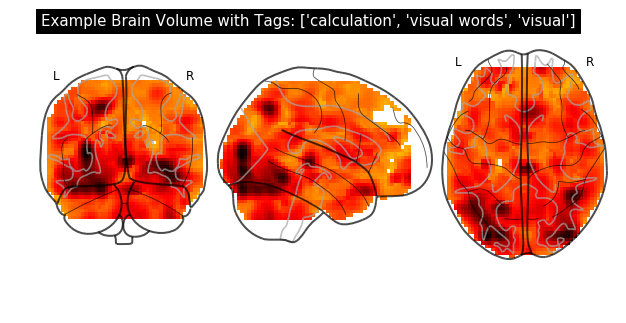

In [0]:
fig = plt.figure(figsize=(8, 4))
plotting.plot_glass_brain(stat_map_img=upsampled_example_brain_data,
                          threshold='auto',
                          title="Example Brain Volume with Tags: {0}".format(example_brain_data_decoded_tags),
                          figure=fig)
plt.show()

# Models

Setup model hyperparameters.

In [0]:
MODEL_DIMENSIONALITY = 64
CONDITONING_DIMENSIONALITY = 5

CRITIC_UPDATES_PER_GENERATOR_UPDATE = 1

NOISE_SAMPLE_LENGTH = 128

Construct models.

NOTE: Depending on the hyperparameter settings above, the dimensionality of the label vector, noise vector, and layers may not exactly match the figure below.

![ICW-fMRI-GAN Model Architecture](https://raw.githubusercontent.com/BlissChapman/OHBMDeepBrainSynthesisTutorial/master/models/resources/architecture.png)

In [0]:
generator = Generator(input_size=NOISE_SAMPLE_LENGTH,
                      output_shape=brain_data_shape,
                      dimensionality=MODEL_DIMENSIONALITY,
                      num_classes=brain_data_tag_shape[0],
                      conditioning_dimensionality=CONDITONING_DIMENSIONALITY,
                      cudaEnabled=CUDA)
critic = Critic(dimensionality=MODEL_DIMENSIONALITY,
                num_classes=brain_data_tag_shape[0],
                conditioning_dimensionality=CONDITONING_DIMENSIONALITY,
                cudaEnabled=CUDA)

#### Load and Save Pretrained Models

In [0]:
generator_weight_path = 'models/weights/generator.pt'
critic_weight_path = 'models/weights/critic.pt'
epoch_weight_path = 'models/weights/epoch.npy'

In [0]:
def save_checkpoint(epoch):
    torch.save(generator.state_dict(), generator_weight_path)
    torch.save(critic.state_dict(), critic_weight_path)
    np.save(epoch_weight_path, epoch)

In [0]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def load_checkpoint():
    epochs_trained = 0
    if os.path.exists(generator_weight_path) and os.path.exists(critic_weight_path) and os.path.exists(epoch_weight_path):
        generator.load_state_dict(torch.load(generator_weight_path, map_location=DEVICE))
        critic.load_state_dict(torch.load(critic_weight_path, map_location=DEVICE))
        epochs_trained = np.load(epoch_weight_path) + 1
        print("Loaded models with {} epochs pretrained...".format(epochs_trained))
    else:
        print("Starting from scratch...")
    return epochs_trained

# Training

In [0]:
NUM_EPOCHS_TO_TRAIN = 5
LAMBDA = 10

Objective to optimize:

![ICW-fMRI-GAN Model Objective](https://raw.githubusercontent.com/BlissChapman/OHBMDeepBrainSynthesisTutorial/master/models/resources/objective.png)

In [0]:
def noise(size, cuda=False):
    noise = torch.from_numpy(np.random.normal(0.0, size=size)).float()
    if cuda:
        noise = noise.cuda()
    return noise

In [0]:
def train(epoch):
    
    sum_critic_loss = 0.0
    sum_generator_loss = 0.0
    num_batches_in_epoch = all_brain_data.shape[0] // BATCH_SIZE
    
    for _ in tqdm(range(num_batches_in_epoch)):
        
        data_batch, label_batch = next(brainpedia_batch_generator)
        data_batch = Variable(data_batch)
        label_batch = Variable(label_batch)
                    
        # (1) Train critic to distinguish between real and synthetic brain samples
        for critic_step in range(CRITIC_UPDATES_PER_GENERATOR_UPDATE):

            # Generate synthetic data batch for true labels
            critic_noise_batch = Variable(noise(size=(label_batch.shape[0], NOISE_SAMPLE_LENGTH), cuda=CUDA))
            synthetic_data_batch = generator(critic_noise_batch, label_batch)
            
            # Train critic to distinguish between the real and synthetic brain samples
            critic_loss = critic.train(data_batch, synthetic_data_batch, label_batch, LAMBDA)
            sum_critic_loss += critic_loss.item()

        # (2) Train generator to fool critic
        generator_noise_batch = Variable(noise(size=(label_batch.shape[0], NOISE_SAMPLE_LENGTH), cuda=CUDA))
        synthetic_data_batch = generator(generator_noise_batch, label_batch)
        critic_predictions = critic(synthetic_data_batch, label_batch)
        generator_loss = generator.train(critic_predictions)
        sum_generator_loss += generator_loss.item()
                        
    return sum_critic_loss / num_batches_in_epoch, sum_generator_loss / num_batches_in_epoch

In [0]:
def visualize(epoch):
    
    for data_batch, label_batch in brainpedia_batch_generator:
        
        # Visualize real samples vs synthetic samples
        num_samples_to_visualize = min(data_batch.shape[0], 5)
        fig = plt.figure(figsize=(10*num_samples_to_visualize, 10))
        
        # Generate synthetic samples for labels
        noise_g = Variable(noise(size=(label_batch.shape[0], NOISE_SAMPLE_LENGTH), cuda=CUDA))
        synthetic_data_batch = generator(noise_g, label_batch)
        
        # Visualize comparison between real and synthetic samples
        subplot_idx = 1
        
        for sample_idx in range(num_samples_to_visualize):
            
            data = data_batch[sample_idx]
            synthetic_data = synthetic_data_batch[sample_idx]
            label = label_batch[sample_idx]
            
            data = data.cpu().data.numpy().squeeze()
            synthetic_data = synthetic_data.cpu().data.numpy().squeeze()
            label = brainpedia.preprocessor.decode_label(label)
            
            # Upsample 
            upsampled_data = invert_preprocessor_scaling(data, brainpedia.preprocessor)
            upsampled_synthetic_data = invert_preprocessor_scaling(synthetic_data, brainpedia.preprocessor)

            # Visualize samples
            ax = fig.add_subplot(2, num_samples_to_visualize, subplot_idx)
            plotting.plot_glass_brain(stat_map_img=upsampled_data,
                                      threshold='auto',
                                      title="True {0}".format(label),
                                      axes=ax)
            ax = fig.add_subplot(2, num_samples_to_visualize, subplot_idx+num_samples_to_visualize)
            plotting.plot_glass_brain(stat_map_img=upsampled_synthetic_data,
                                      threshold='auto',
                                      title="Synthetic {0}".format(label),
                                      axes=ax)
            subplot_idx += 1
        
        plt.show()
        break

  0%|          | 0/51 [00:00<?, ?it/s]

Loaded models with 236 epochs pretrained...


100%|██████████| 51/51 [00:28<00:00,  1.81it/s]


========= EPOCH 236 ==========
CRITIC LOSS   : 0.0771
GENERATOR LOSS: -1.9862



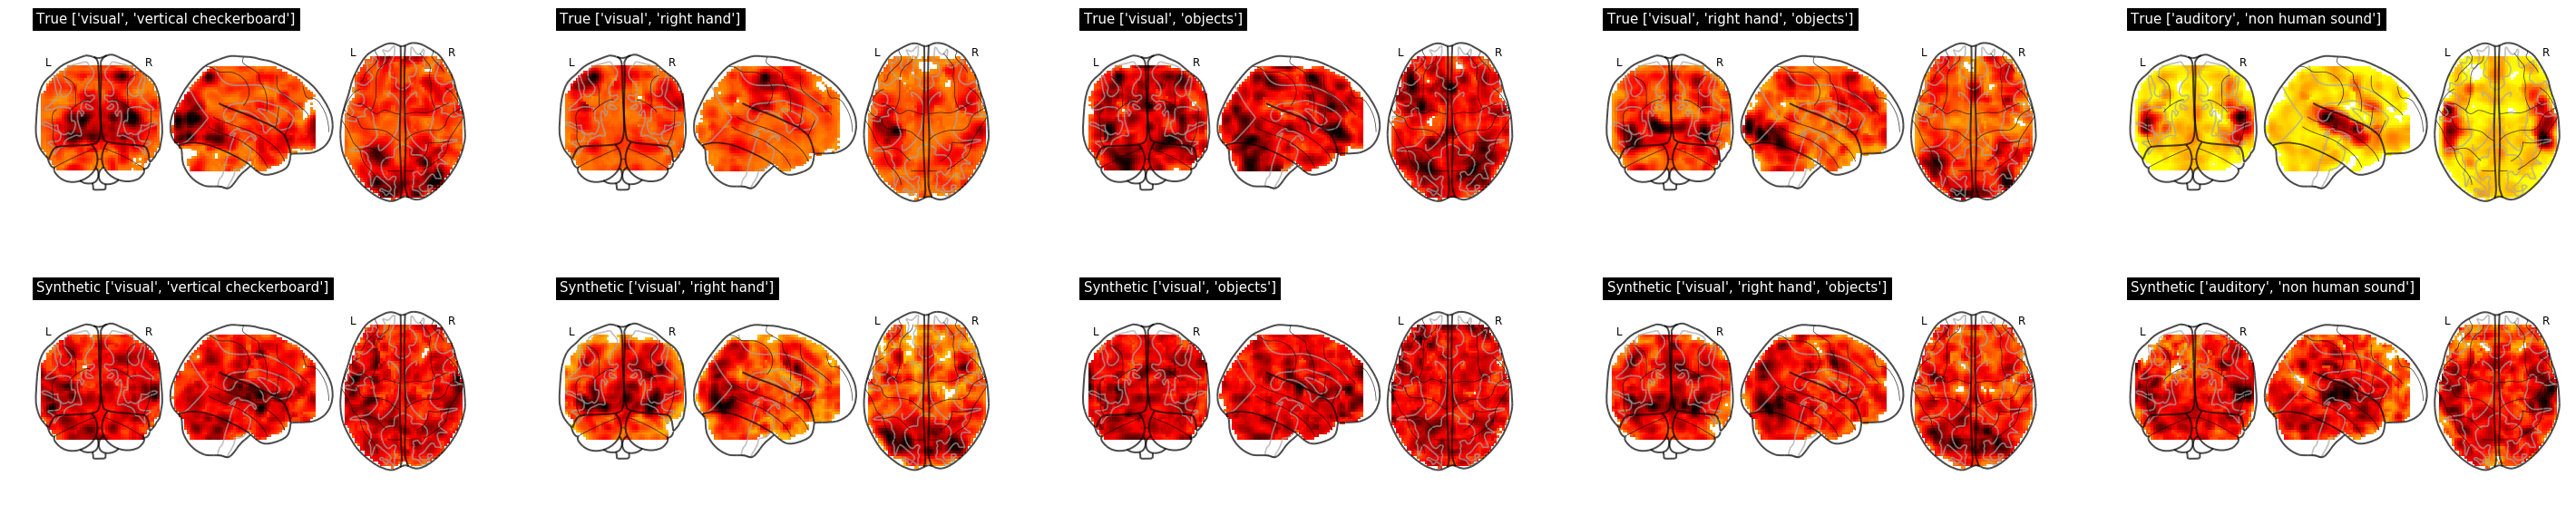

100%|██████████| 51/51 [00:29<00:00,  1.73it/s]


========= EPOCH 237 ==========
CRITIC LOSS   : 0.0289
GENERATOR LOSS: -2.1478



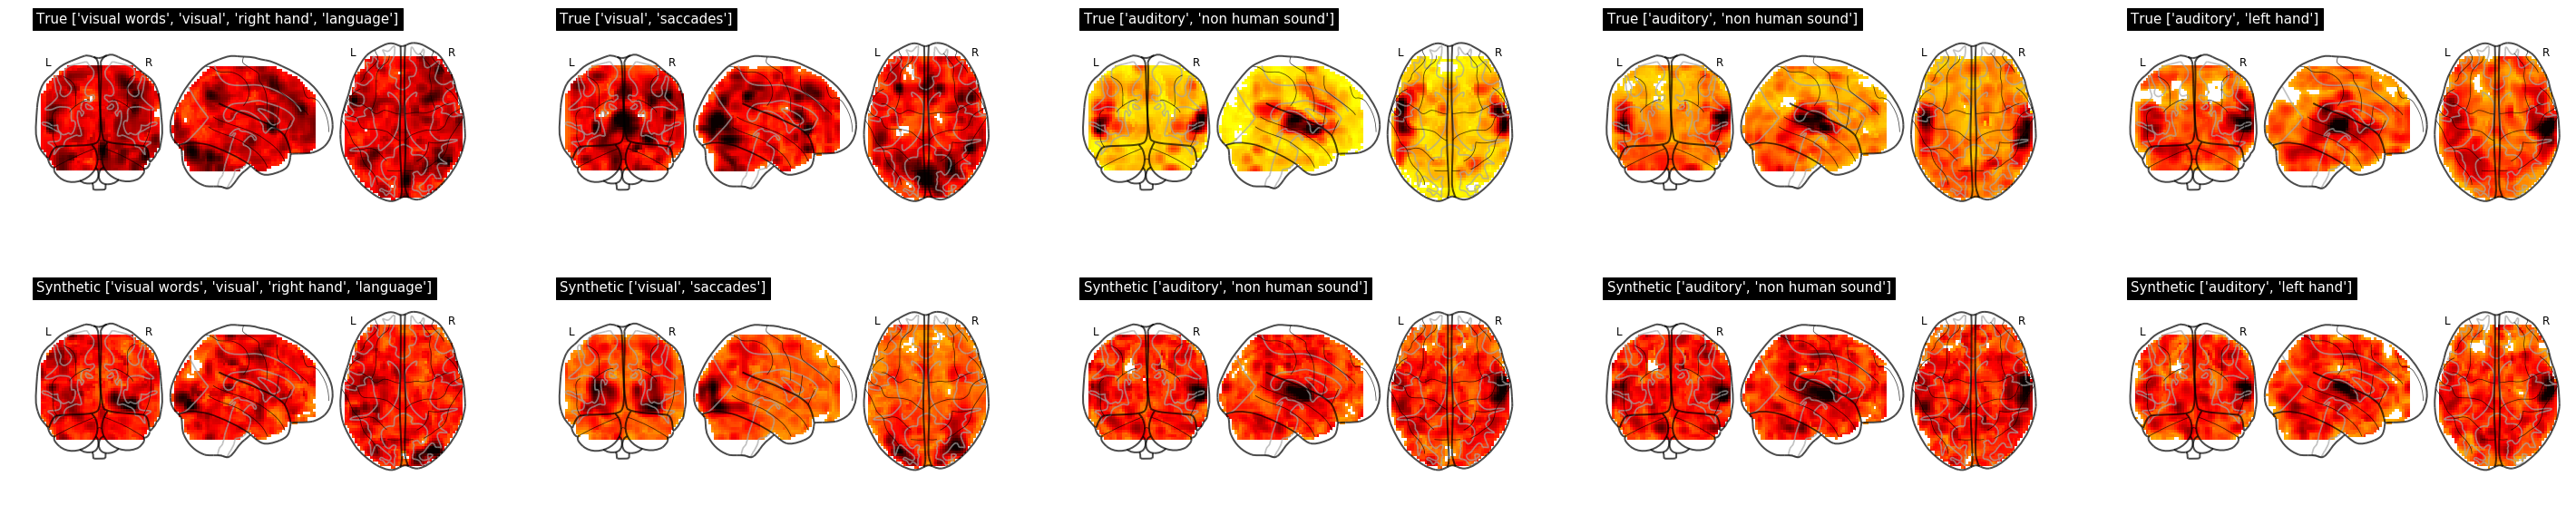

100%|██████████| 51/51 [00:29<00:00,  1.71it/s]


========= EPOCH 238 ==========
CRITIC LOSS   : 0.0270
GENERATOR LOSS: -2.2082



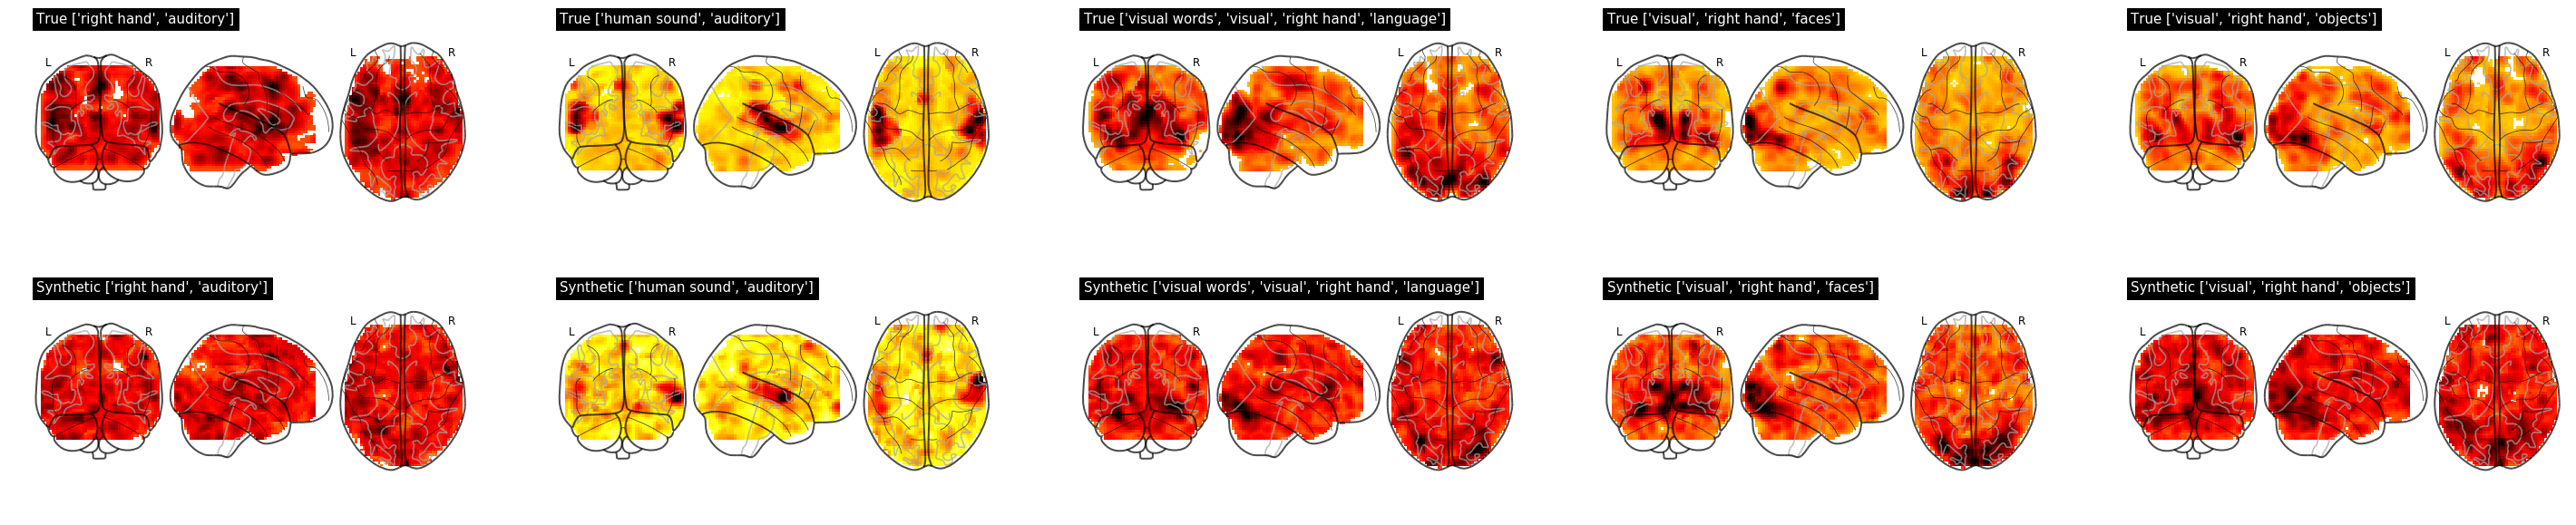

100%|██████████| 51/51 [00:29<00:00,  1.71it/s]


========= EPOCH 239 ==========
CRITIC LOSS   : 0.0263
GENERATOR LOSS: -2.3561



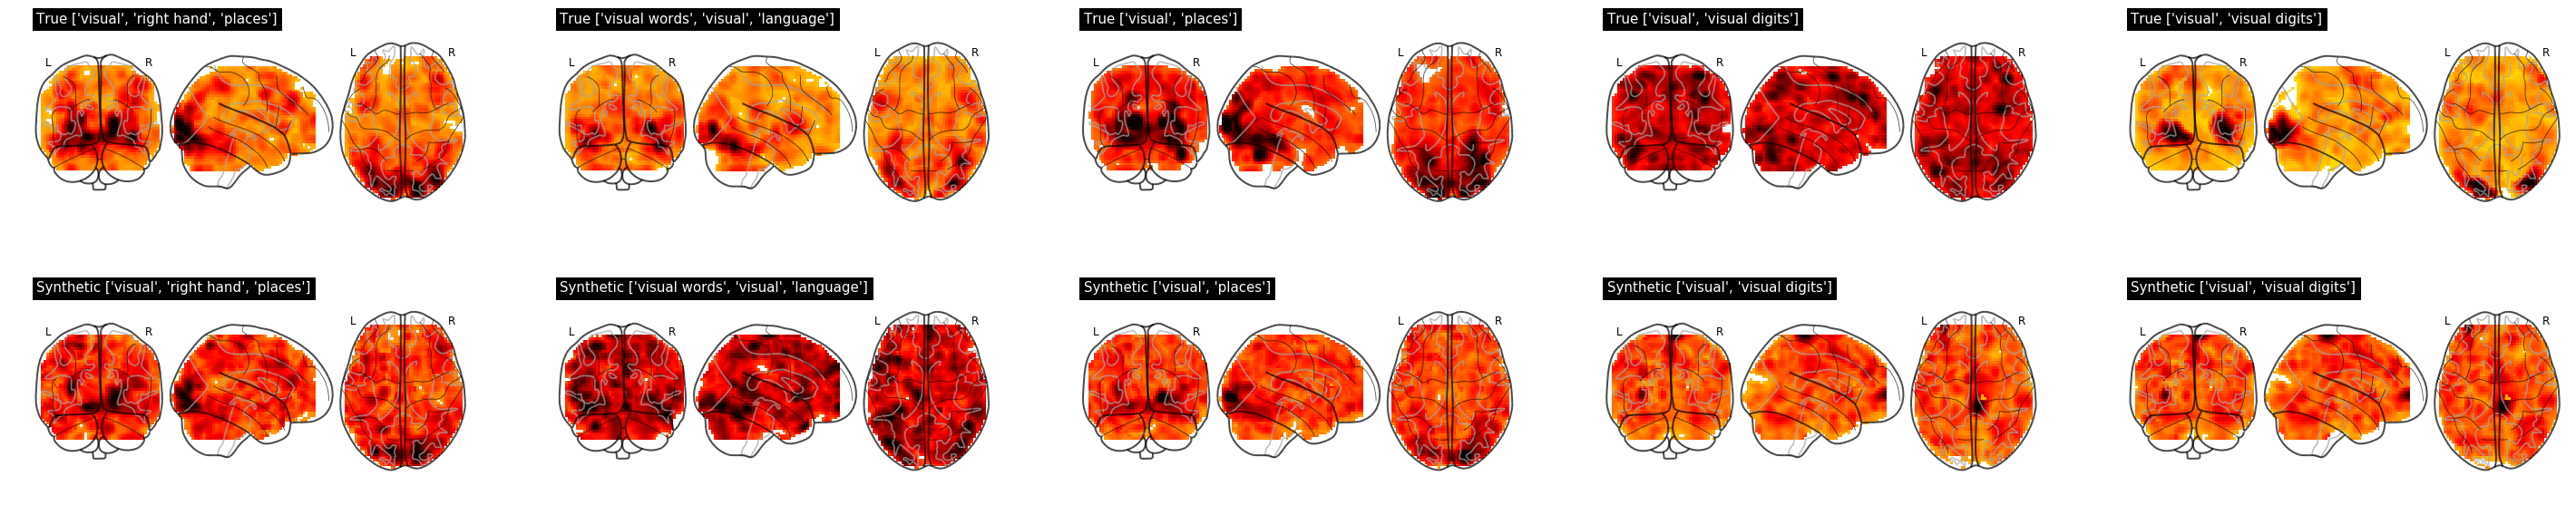

100%|██████████| 51/51 [00:29<00:00,  1.71it/s]


========= EPOCH 240 ==========
CRITIC LOSS   : 0.0281
GENERATOR LOSS: -2.4924



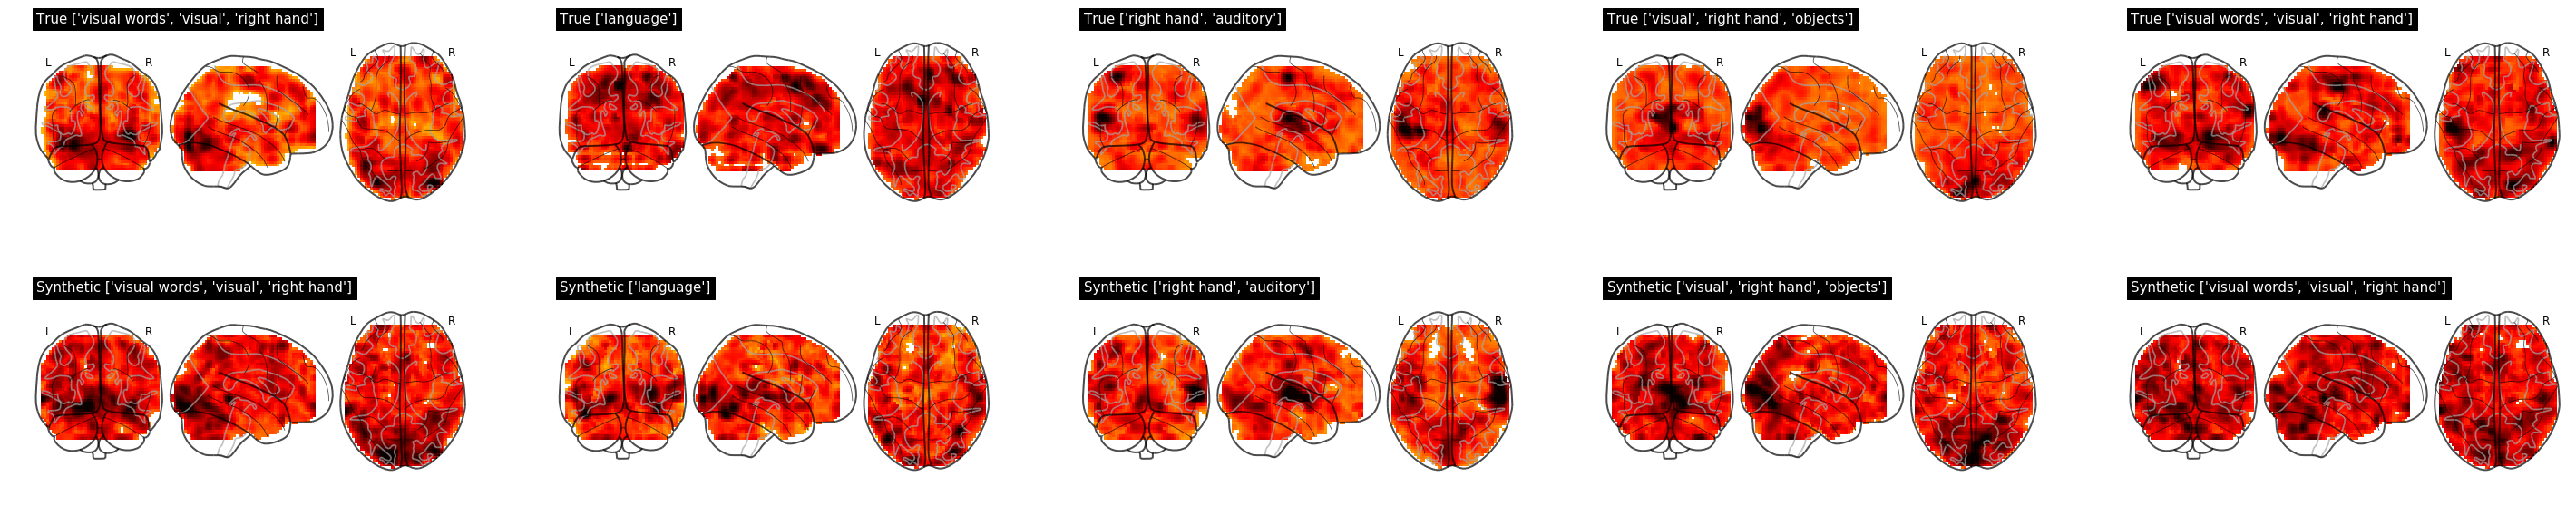

In [0]:
epochs_pretrained = load_checkpoint()

for epoch in range(epochs_pretrained, epochs_pretrained+NUM_EPOCHS_TO_TRAIN):
    
    # Train for an epoch
    critic_loss, generator_loss = train(epoch)
    
    print("========= EPOCH {0} ==========".format(epoch))
    print("CRITIC LOSS   : {0:.4f}".format(critic_loss))
    print("GENERATOR LOSS: {0:.4f}\n".format(generator_loss))
    
    # Checkpoint model
    save_checkpoint(epoch)
    
    # Visualize model output
    visualize(epoch)
    